In [205]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier


import sys
sys.path.append('../')

from src.bet_sizing import SimultaneousKelly

In [206]:
train_df = pd.read_csv("../data/processed/train.csv").drop(columns=["BOUT_ID", "EVENT_ID", "DATE", "BOUT_ORDINAL"])
test_df = pd.read_csv("../data/processed/test.csv").drop(columns=["BOUT_ID", "EVENT_ID", "DATE", "BOUT_ORDINAL"])

test_df = test_df.loc[test_df["RED_WIN"].notnull()]

In [207]:
X_train = train_df.drop(columns=["RED_WIN"])
y_train = train_df["RED_WIN"]
X_test = test_df.drop(columns=["RED_WIN"])
y_test = test_df["RED_WIN"]

In [208]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [209]:
# clf = HistGradientBoostingClassifier(max_depth=2, random_state=0, l2_regularization=0.2, max_leaf_nodes=7)
clf = GradientBoostingClassifier(max_depth=2, random_state=0, n_estimators=100, max_features="sqrt")
clf.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=2, max_features='sqrt', random_state=0)

In [210]:
y_pred_train = clf.predict_proba(X_train)[:, 1]
log_loss(y_train, y_pred_train) # type: ignore

0.595024528679359

In [211]:
y_pred_test = clf.predict_proba(X_test)[:, 1] # type: ignore
log_loss(y_test, y_pred_test) # type: ignore

0.6264275169061493

In [212]:
from sklearn.calibration import CalibrationDisplay

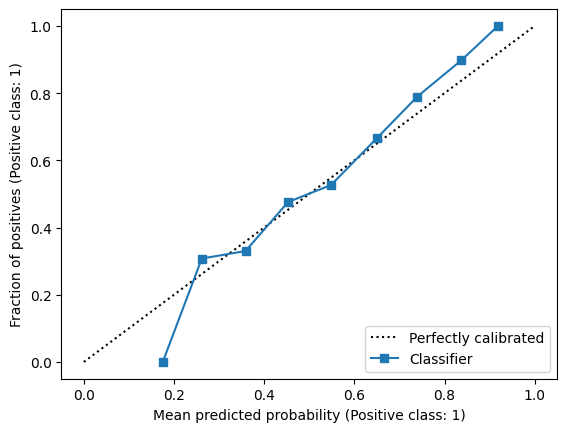

In [213]:
disp = CalibrationDisplay.from_predictions(y_test, y_pred_test, n_bins=10)